In [9]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [10]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match, assess_goodnes_srgz_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

In [11]:
ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
#ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')
ero_ctps_pandas.ID = ero_ctps_pandas.ID.str.decode('utf-8')
ero_ctps_pandas.desi_id_true_ctp = ero_ctps_pandas.desi_id_true_ctp.str.decode('utf-8')
ero_ctps_pandas.rename(columns={'ID':'srcname_fin'}, inplace=True)
ero_ctps_pandas


,srcname_fin,desi_id_true_ctp
0,SRGe J103105.9+573747,9011_610714_1440
1,SRGe J103118.8+574434,9011_610714_1908
2,SRGe J103123.8+574309,9011_610714_2092
3,SRGe J103130.8+573932,9011_610714_2412
4,SRGe J103137.0+573159,9011_609939_1093
...,...,...
753,SRGe J110633.0+590313,9011_614527_1198
754,SRGe J110645.0+590331,9011_614527_1596
755,SRGe J110648.4+585514,9011_614527_1704
756,SRGe J110721.2+585635,9011_614527_2647


In [12]:
desi = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match.gz_pkl', compression='gzip')
desi = desi[desi['flux_05-20']>1e-14]
desi.reset_index(drop=True, inplace=True)
desi = desi[['srcname_fin', 'nway_desi_id', 'nway_Separation_EROSITA_DESI', 'nway_prob_has_match', 'nway_prob_this_match' ]]
desi = desi.merge(ero_ctps_pandas, on='srcname_fin', how='left')
desi.head(10)

,srcname_fin,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match,desi_id_true_ctp
0,SRGe J101903.3+563020,9011_606779_231,5.167984,0.978923,0.983858,NaN
1,SRGe J101903.4+563325,9011_606779_284,12.929691,0.542276,0.807592,NaN
2,SRGe J101911.0+562639,9011_606779_455,15.145586,0.000003,0.846041,NaN
3,SRGe J101914.3+563109,9011_606779_560,13.421277,0.465052,0.754001,NaN
4,SRGe J101919.2+562429,9011_606779_666,0.650717,0.997649,0.999971,NaN
5,SRGe J101922.0+560903,9011_605977_2894,12.892956,0.036324,0.792424,NaN
6,SRGe J101923.1+562820,9011_606779_799,7.956673,0.502829,0.814573,NaN
7,SRGe J101923.7+561135,9011_605977_2902,8.658630,0.004149,0.994264,NaN
8,SRGe J101925.5+561726,9011_605977_2954,2.023571,0.826513,0.924857,NaN
9,SRGe J101927.4+560414,9011_605171_1958,3.345640,0.119734,0.471220,NaN


In [14]:
desi_srgz = pd.read_csv(data_path+'lhpv_srgz_v0.csv')
desi_srgz = desi_srgz[desi_srgz['flux_05-20']>1e-14]

desi_srgz.drop(['Unnamed: 0'], axis=1, inplace=True)
desi_srgz.sort_values(['ID_SRC', 'is_phot_most_probable', 'p_plim'], inplace=True, ascending=False)
desi_srgz.rename(columns={'ID_SRC': 'srcname_fin',}, inplace=True)
desi_srgz = desi_srgz[['srcname_fin', 'Separation', 'pc_DL', 'desi_id', 'p_pos', 'p_plim', 'is_pos_most_probable', 'is_phot_most_probable', 'P_0']]

desi_srgz.rename(columns={'desi_id': 'srgz_desi_id', 'Separation': 'srgz_separation', 'pc_DL': 'srgz_pc_DL', 'p_pos': 'srgz_p_pos', 'p_plim': 'srgz_p_plim', 'is_pos_most_probable': 'srgz_is_pos_most_probable', 'is_phot_most_probable': 'srgz_is_phot_most_probable', 'P_0': 'srgz_P_0' }, inplace=True)
desi_srgz['srgz_P_0_inv'] = 1.0 - desi_srgz['srgz_P_0']
desi_srgz = desi_srgz.merge(ero_ctps_pandas, on='srcname_fin', how='left')
desi_srgz = desi_srgz[desi_srgz.srgz_is_phot_most_probable==1]

desi_srgz.head(10)

,srcname_fin,srgz_separation,srgz_pc_DL,srgz_desi_id,srgz_p_pos,srgz_p_plim,srgz_is_pos_most_probable,srgz_is_phot_most_probable,srgz_P_0,srgz_P_0_inv,desi_id_true_ctp
0,SRGe J110820.3+584414,7.881151,0.996546,9011_613780_320,0.000004,0.000010,False,True,0.999999,0.000001,NaN
15,SRGe J110815.1+583836,8.847408,0.809869,9011_613780_135,0.101597,0.164965,True,True,0.809436,0.190564,NaN
29,SRGe J110757.2+590708,3.837570,0.771233,9011_614528_202,0.574821,0.700354,True,True,0.260933,0.739067,NaN
46,SRGe J110750.9+590607,3.761557,0.789828,9011_614527_3718,0.586355,0.742528,True,True,0.226271,0.773729,NaN
70,SRGe J110749.6+583509,8.194925,0.820535,9011_613026_2352,0.142086,0.319205,True,True,0.712972,0.287028,NaN
79,SRGe J110736.7+585607,5.121631,0.848092,9011_614527_3161,0.469804,0.695792,True,True,0.347225,0.652775,NaN
93,SRGe J110729.8+585554,3.438832,0.902007,9011_614527_2933,0.653290,0.797509,True,True,0.167992,0.832008,NaN
114,SRGe J110721.3+590113,0.635151,0.705372,9011_614527_2679,0.652863,0.778060,True,True,0.138554,0.861446,9011_614527_2679
123,SRGe J110721.2+585635,4.918735,0.874261,9011_614527_2665,0.488461,0.616482,True,True,0.402539,0.597461,9011_614527_2647
144,SRGe J110715.1+584302,5.207767,0.925533,9011_613779_2281,0.409724,0.656593,True,True,0.454299,0.545701,NaN


In [15]:
desi_nway_srgz = desi_srgz.merge(desi, on=['srcname_fin', 'desi_id_true_ctp'], how='left')
desi_nway_srgz

,srcname_fin,srgz_separation,srgz_pc_DL,srgz_desi_id,srgz_p_pos,srgz_p_plim,srgz_is_pos_most_probable,srgz_is_phot_most_probable,srgz_P_0,srgz_P_0_inv,desi_id_true_ctp,nway_desi_id,nway_Separation_EROSITA_DESI,nway_prob_has_match,nway_prob_this_match
0,SRGe J110820.3+584414,7.881151,0.996546,9011_613780_320,0.000004,0.000010,False,True,0.999999,1.108723e-06,NaN,9011_613780_320,7.881151,0.048984,0.998651
1,SRGe J110815.1+583836,8.847408,0.809869,9011_613780_135,0.101597,0.164965,True,True,0.809436,1.905644e-01,NaN,9011_613780_194,12.047708,0.738645,0.946102
2,SRGe J110757.2+590708,3.837570,0.771233,9011_614528_202,0.574821,0.700354,True,True,0.260933,7.390665e-01,NaN,9011_614528_202,3.837570,0.061996,0.604102
3,SRGe J110750.9+590607,3.761557,0.789828,9011_614527_3718,0.586355,0.742528,True,True,0.226271,7.737293e-01,NaN,9011_614527_3759,12.456695,0.423802,0.795626
4,SRGe J110749.6+583509,8.194925,0.820535,9011_613026_2352,0.142086,0.319205,True,True,0.712972,2.870279e-01,NaN,9011_613026_2352,8.194925,0.666715,0.781538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,SRGe J101919.2+562429,0.650717,0.991958,9011_606779_666,0.915483,0.983782,True,True,0.087720,9.122804e-01,NaN,9011_606779_666,0.650717,0.997649,0.999971
2515,SRGe J101914.3+563109,8.580861,0.799773,9011_606779_556,0.126190,0.247119,True,True,0.619477,3.805234e-01,NaN,9011_606779_560,13.421277,0.465052,0.754001
2516,SRGe J101911.0+562639,15.145586,0.919283,9011_606779_455,0.000001,0.000002,True,True,1.000000,4.474891e-07,NaN,9011_606779_455,15.145586,0.000003,0.846041
2517,SRGe J101903.4+563325,9.594825,0.902798,9011_606779_218,0.016563,0.018113,True,True,0.989743,1.025714e-02,NaN,9011_606779_284,12.929691,0.542276,0.807592


In [18]:
print('Total TRUE ctp:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna()')))


print('SRGz ctp = NWAY ctp:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna() & srgz_desi_id==nway_desi_id')))

print('SRGz ctp = TRUE ctp:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna() & srgz_desi_id==desi_id_true_ctp')))

print('NWAY ctp = TRUE ctp:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna() & nway_desi_id==desi_id_true_ctp')))

print('SRGz ctp = NWAY ctp = TRUE ctp:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna() & srgz_desi_id==nway_desi_id & srgz_desi_id==desi_id_true_ctp')))

print('SRGz ctp !=   NWAY ctp:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna() & srgz_desi_id!=nway_desi_id')))

print('SRGz ctp = TRUE, NWAY ctp != TRUE:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna() & srgz_desi_id==desi_id_true_ctp & nway_desi_id!=desi_id_true_ctp')))

print('SRGz ctp != TRUE, NWAY ctp = TRUE:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna() & srgz_desi_id!=desi_id_true_ctp & nway_desi_id==desi_id_true_ctp')))

print('SRGz ctp != TRUE, NWAY ctp != TRUE:')
print(len(desi_nway_srgz.query('~desi_id_true_ctp.isna() & srgz_desi_id!=desi_id_true_ctp & nway_desi_id!=desi_id_true_ctp & srgz_desi_id!=nway_desi_id')))

Total TRUE ctp:
289
SRGz ctp = NWAY ctp:
283
SRGz ctp = TRUE ctp:
276
NWAY ctp = TRUE ctp:
281
SRGz ctp = NWAY ctp = TRUE ctp:
276
SRGz ctp !=   NWAY ctp:
6
SRGz ctp = TRUE, NWAY ctp != TRUE:
0
SRGz ctp != TRUE, NWAY ctp = TRUE:
5
SRGz ctp != TRUE, NWAY ctp != TRUE:
1


-----

cross_match PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for cross_match matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct cross_match assignment
 Completeness = 98% 
 Purity = 98% 
 prob_has_match optimal cutoff =  0.8 
 Fraction of sources with prob_has_match > 0.8 = 82%
+++Statistics+++
289 X-ray sources in validation set with counterparts
--Out of those, 6 sources were assigned hostless (prob_has_match < 0.8) 
283 sources have prob_has_match > 0.8
Out of those 283: 
--277 sources have correct cross_match counterpart
--6 sources have incorrect cross_match counterpart
cross_match PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for cross_match matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct cross_match assignment
 Completeness = 95% 
 Purity = 95% 
 prob_has_match optimal cutoff =  0.38 

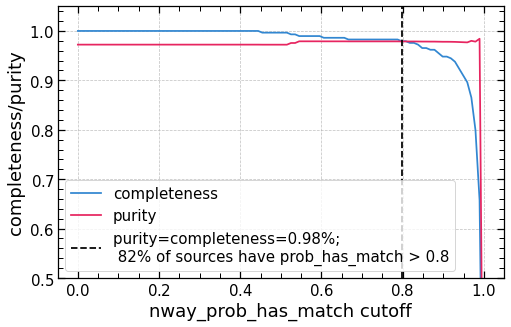

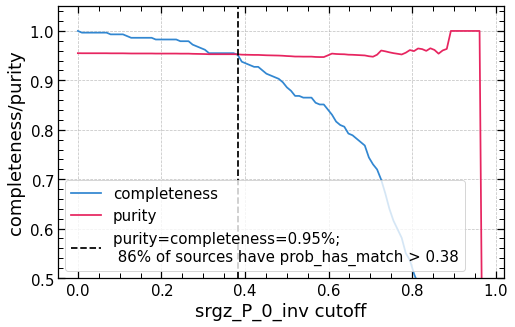

In [19]:
from scripts.cross_match_scripts import find_completeness_purity_intercept


def assess_goodnes_cross_match(df, plot_res = True, calibration_column = 'srgz_P_0_inv',
                                desi_id_col = 'srgz_desi_id'):
    # calibration_column = 'srgz_P_0_inv' for srgz, 'nway_prob_has_match' for nway 
    # desi_id_col = 'srgz_desi_id' for srgz, 'nway_desi_id' for nway   
    print("="*20)
    print('cross_match PERFOMANCE ON THE VALIDATION CATALOG')
    df = df.copy()
    test_df_matched = df[~df.desi_id_true_ctp.isna()]

    test_df_matched.loc[:, 'cross_match_equal_true'] = test_df_matched[desi_id_col] == test_df_matched.desi_id_true_ctp


    cutoffs = np.linspace(df[calibration_column].min(),df[calibration_column].max(),100)

    def calcu_stats(test_df_matched, cutoffs):
        total_ctps = len(test_df_matched)
        completeness = []
        purity = []
        for p in cutoffs:
            cutoff_mask = test_df_matched[calibration_column] > p
            true_check_mask = test_df_matched.cross_match_equal_true

            n_assigned_ctps = len(test_df_matched[cutoff_mask])
            if n_assigned_ctps == 0:
                C = 0
                P = 0
            else:
                true_assignment = len(test_df_matched[cutoff_mask & true_check_mask])
                false_assingment = len(test_df_matched[cutoff_mask & ~true_check_mask])

                C = n_assigned_ctps / total_ctps

                P = true_assignment / n_assigned_ctps

            completeness.append(C)
            purity.append(P)
        completeness = np.array(completeness)
        purity = np.array(purity)
        return cutoffs, completeness, purity

    cutoffs, completeness, purity = calcu_stats(test_df_matched, cutoffs)

    print('Completeness and purity for cross_match matching \n'+ 'completeness = fraction of sources with prob_has_match > p \n' + 'purity = fraction of sources with prob_has_match > p and correct cross_match assignment')

    plt.figure(figsize=(8,5))
    plt.plot(cutoffs, completeness, label='completeness')
    plt.plot(cutoffs, purity, label='purity')

    cutoff_intersection, completeness_intersection, purity_intersection = find_completeness_purity_intercept(cutoffs, completeness, purity)

    frac_src_p_any_over = (df[calibration_column] > cutoff_intersection ).astype(int).mean()
    frac_src_p_any_over = np.round(frac_src_p_any_over*100, 2)


    plt.axvline(cutoff_intersection, color='k', ls='--', label=f'purity=completeness={completeness_intersection:.2g}%; \n {frac_src_p_any_over:.2g}% of sources have prob_has_match > {cutoff_intersection:.2g}')

    plt.legend()
    plt.ylim(0.5, 1.05)
    plt.xlabel(calibration_column+ ' cutoff')
    plt.ylabel('completeness/purity')

    print(f" Completeness = {100*completeness_intersection:.2g}% \n Purity = {100*purity_intersection:.2g}% \n prob_has_match optimal cutoff =  {cutoff_intersection:.2g} \n Fraction of sources with prob_has_match > {cutoff_intersection:.2g} = {frac_src_p_any_over:.2g}%")


    cutoff_mask = test_df_matched[calibration_column] > cutoff_intersection
    true_check_mask = test_df_matched.cross_match_equal_true

    n_assigned_ctps = len(test_df_matched[cutoff_mask])

    true_assignment = len(test_df_matched[cutoff_mask & true_check_mask])
    false_assingment = len(test_df_matched[cutoff_mask & ~true_check_mask])

    print('+++Statistics+++')
    print(f"{len(test_df_matched)} X-ray sources in validation set with counterparts") 
    print(f"--Out of those, {len(test_df_matched)-n_assigned_ctps} sources were assigned hostless (prob_has_match < {cutoff_intersection:.2g}) ")
    print(f"{n_assigned_ctps} sources have prob_has_match > {cutoff_intersection:.2g}")
    print(f'Out of those {n_assigned_ctps}: ')
    print(f"--{true_assignment} sources have correct cross_match counterpart")
    print(f"--{false_assingment} sources have incorrect cross_match counterpart")


    if not plot_res:
        plt.close()

    return cutoff_intersection, completeness_intersection,  cutoffs, completeness, purity


assess_goodnes_cross_match(desi, plot_res = True, calibration_column = 'nway_prob_has_match', desi_id_col='nway_desi_id');
assess_goodnes_cross_match(desi_nway_srgz.query('0<=srgz_P_0<=1'), plot_res = True, calibration_column = 'srgz_P_0_inv', desi_id_col='srgz_desi_id');